# Creata database

In [1]:
from pathlib import Path

import h5py
import numpy as np
from magtense.utils import plot_M_thin_film

from koopmag.database import create_db_mp
from koopmag.utils import plot_dynamics

In [32]:
40 / 16
200 * 2.5

500.0

In [33]:
db_kwargs = {
    "res": [40, 16, 1],
    "grid_size": [500e-9, 200e-9, 3e-9],
    "n_seq": 120,
    "t_steps": 150,
    "t_per_step": 15e-12,
    "cuda": True,
}

create_db_mp("std_prob_4", n_workers=1, **db_kwargs)

100%|██████████| 120/120 [01:16<00:00,  1.56it/s]


/home/s204790/koopman-magnetics/src/koopmag/../../data/120_150_40_16_0_120.h5
Database created


## Inspect database

In [24]:
datapath = Path().cwd().parent / "data"
db = h5py.File(datapath / "120_150_36_12.h5", "r")

print("Attributes of database:")
for key in db.attrs:
    print(f"{key}: {db.attrs[key]}")

print("\nData in the database:")
for key in db:
    print(f"{key}: {db[key].shape}")

Attributes of database:
grid_size: [5.00e-07 1.67e-07 3.00e-09]
h_ext_angle: [  0 360]
h_ext_norm: [ 0 50]
res: [36 12  1]
seed: 0
t_per_step: 1.5e-11
t_steps: 150

Data in the database:
field: (120, 3)
sequence: (120, 150, 36, 12, 3)



Field 20:
[-12.470139  25.71209    0.      ]


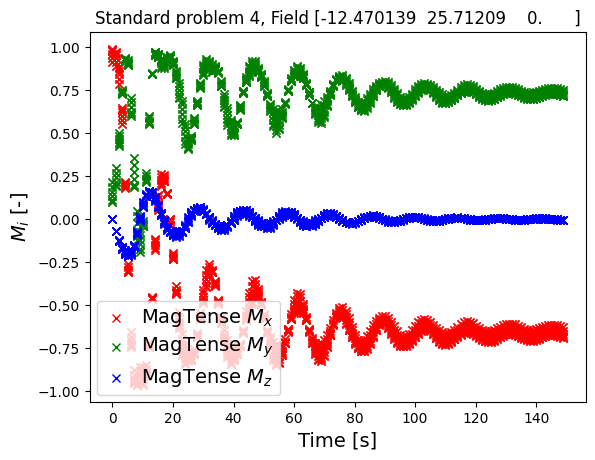

In [25]:
field_idx = 20
print(f"\nField {field_idx}:\n{db['field'][field_idx]}")
plot_dynamics(
    np.arange(db["sequence"][field_idx].shape[0]),
    db["sequence"][field_idx],
    field=db["field"][field_idx],
)

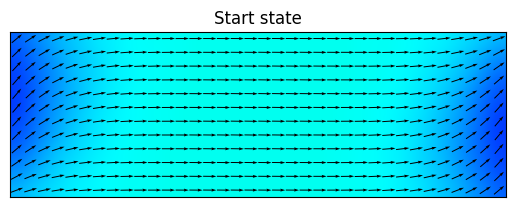

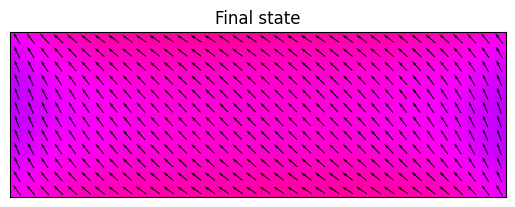

In [26]:
plot_M_thin_film(db["sequence"][field_idx][0], db.attrs["res"], "Start state")
plot_M_thin_film(db["sequence"][field_idx][-1], db.attrs["res"], "Final state")

In [27]:
db.close()